In [13]:
import xarray as xr

#rlzn to do
rlzn_num = 2

if rlzn_num==1:
    fdir = '[CMIP6 MSFTMZ PATH]'
    fname = 'msftmz_Omon_MPI-ESM1-2-HR_ssp245_r1*.nc'
    f = xr.open_mfdataset(fdir+fname,combine='by_coords')
    f
elif rlzn_num==2:
    fdir = '[CMIP6 MSFTMZ PATH]'
    fname = 'msftmz_Omon_MPI-ESM1-2-HR_ssp245_r2*'
    f = xr.open_mfdataset(fdir+fname,combine='by_coords')
    f

In [14]:
print(f.sector.values)
atl_idx = 1 # index of atlantic basin

[b'global_ocean         ' b'atlantic_arctic_ocean'
 b'indian_pacific_ocean ']


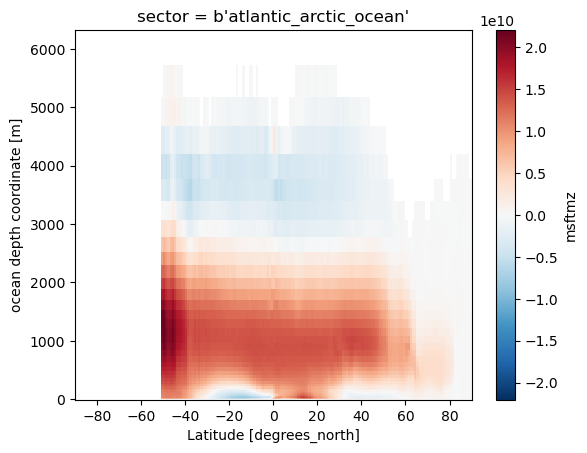

In [15]:
# 2-D structure of AMOC
f['msftmz'].sel(basin=atl_idx).mean('time').plot()

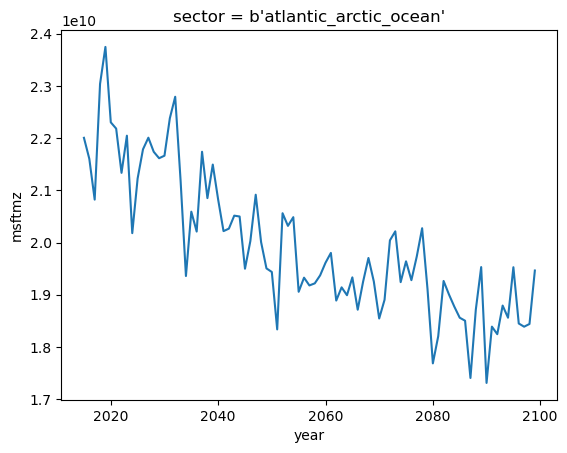

In [16]:
def AMOCI(msftmz,atl_idx=atl_idx):
    return msftmz.sel(basin=atl_idx).where(msftmz.lev>500).where(msftmz.lat>-10).max(('lev','lat'))

def anu(var):
    # annual mean
    return var.groupby('time.year').mean('time')

amoc1 = anu(AMOCI(f['msftmz']))
amoc1.plot()
amoc1.values
path='[EXPORT PATH]'

if rlzn_num==1:
    filename = 'AMOCI_ssp_r1.nc'
elif rlzn_num==2:
    filename = 'AMOCI_ssp_r2.nc'
amoc1.to_netcdf(path+filename)